In [1]:
import pandas as pd
import geopandas as gpd
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Data/ny_od_main_JT00_2019.csv.gz')
df

w_geocode        h_geocode  S000  SA01  SA02  SA03  SE01  SE02  \
0        360010001001004  360010002004006     1     1     0     0     0     0   
1        360010001001004  360930320001020     1     0     1     0     0     0   
2        360010001001005  360010002003009     1     1     0     0     0     0   
3        360010001001005  360010007003002     1     0     1     0     0     0   
4        360010001001005  360010021002003     1     0     0     1     0     0   
...                  ...              ...   ...   ...   ...   ...   ...   ...   
7836552  361231505004020  361231505003007     1     0     1     0     0     1   
7836553  361231505004020  361231505003010     1     0     1     0     0     0   
7836554  361231505004020  361231505003016     1     0     0     1     0     1   
7836555  361231505004023  360550113012014     1     0     0     1     0     0   
7836556  361231505004023  360894926004120     1     0     0     1     0     0   

         SE03  SI01  SI02  SI03  createdate  
0           1     0     0     1    20211018  
1           1     0     0     1    20211018  
2           1     1     0     0    20211018  
3           1     1     0     0    20211018  
4           1     0     1     0    20211018  
...       ...   ...   ...   ...         ...  
7836552     0     0     1     0    20211018  
7836553     1     0     1     0    20211018  
7836554     0     0     1     0    20211018  
7836555     1     0     0     1    20211018  
7836556     1     0     0     1    20211018  

[7836557 rows x 13 columns]

In [3]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int) #aggregate from CBG to Census tract
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct  36001000100  36001000200  36001000300  36001000401  36001000403  \
h_geocode_ct                                                                    
36001000100          17.0         26.0         31.0         21.0         13.0   
36001000200          19.0         77.0         77.0         58.0         26.0   
36001000300           9.0         26.0        117.0         70.0         55.0   
36001000401           2.0         16.0         24.0         41.0         45.0   
36001000403           8.0         23.0         57.0         64.0        114.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0          0.0          0.0          0.0          1.0   
36123150200           0.0          0.0          1.0          0.0          0.0   
36123150300           0.0          0.0          0.0          1.0          1.0   
36123150400           0.0          0.0          0.0          0.0          1.0   
36123150500           0.0          1.0          0.0          0.0          0.0   

w_geocode_ct  36001000404  36001000501  36001000502  36001000600  36001000700  \
h_geocode_ct                                                                    
36001000100           0.0          3.0          7.0          7.0          8.0   
36001000200           0.0         18.0          8.0          8.0         29.0   
36001000300           7.0         12.0         19.0         13.0         54.0   
36001000401           7.0          3.0          5.0          1.0          6.0   
36001000403           8.0         20.0         14.0         17.0         13.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0          0.0          0.0          0.0          0.0   
36123150200           0.0          0.0          0.0          0.0          0.0   
36123150300           0.0          0.0          0.0          0.0          0.0   
36123150400           0.0          0.0          0.0          0.0          0.0   
36123150500           0.0          0.0          0.0          0.0          0.0   

w_geocode_ct  ...  36121970700  36121970800  36121970900  36121971000  \
h_geocode_ct  ...                                                       
36001000100   ...          0.0          0.0          0.0          0.0   
36001000200   ...          0.0          0.0          0.0          0.0   
36001000300   ...          0.0          0.0          0.0          1.0   
36001000401   ...          0.0          0.0          0.0          0.0   
36001000403   ...          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
36123150100   ...          0.0          0.0          1.0          7.0   
36123150200   ...          0.0          0.0          0.0         10.0   
36123150300   ...          1.0          0.0          0.0          8.0   
36123150400   ...          2.0          0.0          1.0          4.0   
36123150500   ...          0.0          0.0          0.0          2.0   

w_geocode_ct  36121971100  36123150100  36123150200  36123150300  36123150400  \
h_geocode_ct                                                                    
36001000100           0.0          0.0          0.0          0.0          0.0   
36001000200           0.0          0.0          0.0          0.0          0.0   
36001000300           0.0          0.0          0.0          0.0          1.0   
36001000401           0.0          0.0          0.0          0.0          0.0   
36001000403           0.0          0.0          0.0          0.0          0.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0        423.0        190.0          8.0         47.0   
36123150200           0.0        128.0        505.0         42.0        197.0   
36123150300           0.0         25.0        144.0        157.0         54.0   
36123150400           0.0         55.0        251.0

In [4]:
# OD_df.to_csv('../Data/OD_alljobs.csv') #dataframe of O-D commutes

In [5]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df.head() #of people who commute to each census tract

S000
w_geocode_ct       
36001000100    1452
36001000200    3064
36001000300   11220
36001000401    9036
36001000403   10752

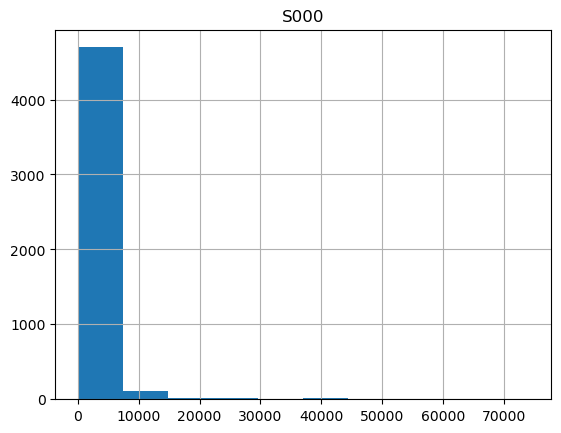

In [6]:
CBD_df.hist(); #histogram of total # of jobs

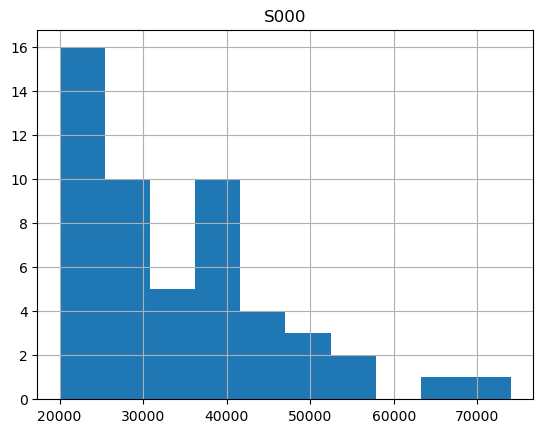

In [7]:
CBD_df[CBD_df['S000']>20000].hist(); # hist zoomed in to CTs with over 20,000 jobs

In [8]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('../Data/geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


/var/folders/9f/7xdrpjw15kn4wccwzb5xhr0m0000gn/T/ipykernel_18840/1249205793.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [9]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['ALAND'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [10]:
nyc_cbd.head()

S000 STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  \
1899  74028.0      36      061  010900  1400000US36061010900  36061010900   
1012  67041.0      36      047  001100  1400000US36047001100  36047001100   
117   52535.0      36      061  011900  1400000US36061011900  36061011900   
1785  51265.0      36      061  010100  1400000US36061010100  36061010100   
572   41809.0      36      061  009400  1400000US36061009400  36061009400   

     NAME          NAMELSAD STUSPS       NAMELSADCO STATE_NAME LSAD   ALAND  \
1899  109  Census Tract 109     NY  New York County   New York   CT  175741   
1012   11   Census Tract 11     NY     Kings County   New York   CT  168507   
117   119  Census Tract 119     NY  New York County   New York   CT  177591   
1785  101  Census Tract 101     NY  New York County   New York   CT  175520   
572    94   Census Tract 94     NY  New York County   New York   CT  152754   

      AWATER                                           geometry  \
1899       0  POLYGON ((-73.99298 40.75285, -73.99253 40.753...   
1012       0  POLYGON ((-73.99045 40.69373, -73.99066 40.694...   
117        0  POLYGON ((-73.98930 40.75791, -73.98884 40.758...   
1785       0  POLYGON ((-73.99484 40.75029, -73.99395 40.751...   
572        0  POLYGON ((-73.98040 40.75415, -73.97994 40.754...   

                        centroid  S000_area_norm  
1899  POINT (-73.98970 40.75225)        0.421234  
1012  POINT (-73.98771 40.69329)        0.397853  
117   POINT (-73.98602 40.75732)        0.295820  
1785  POINT (-73.99154 40.74973)        0.292075  
572   POINT (-73.97775 40.75523)        0.273702

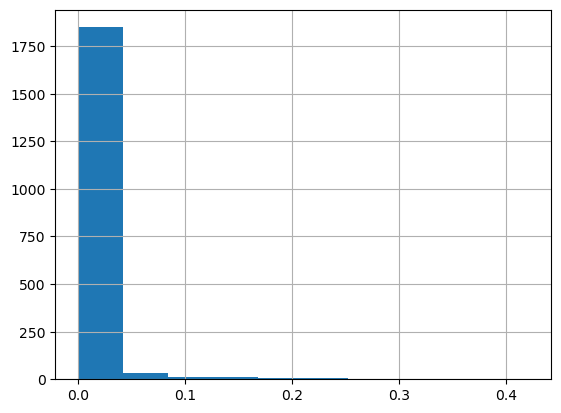

In [11]:
nyc_cbd['S000_area_norm'].hist();

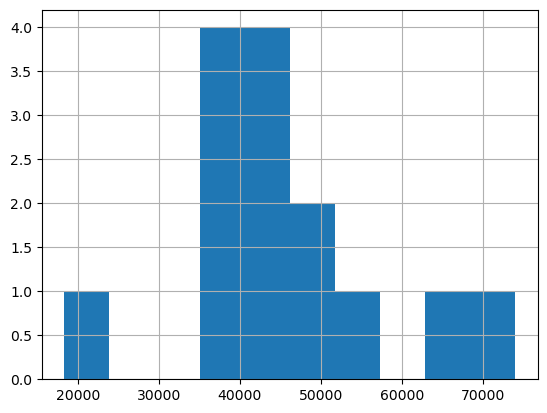

In [12]:
nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].hist();

In [13]:
#five CBDs
jobs_in_cbd=nyc_cbd.head(n=5)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 8.143944397618617 %


In [14]:
#10 CBDs
jobs_in_cbd=nyc_cbd.head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 13.636202227356492 %


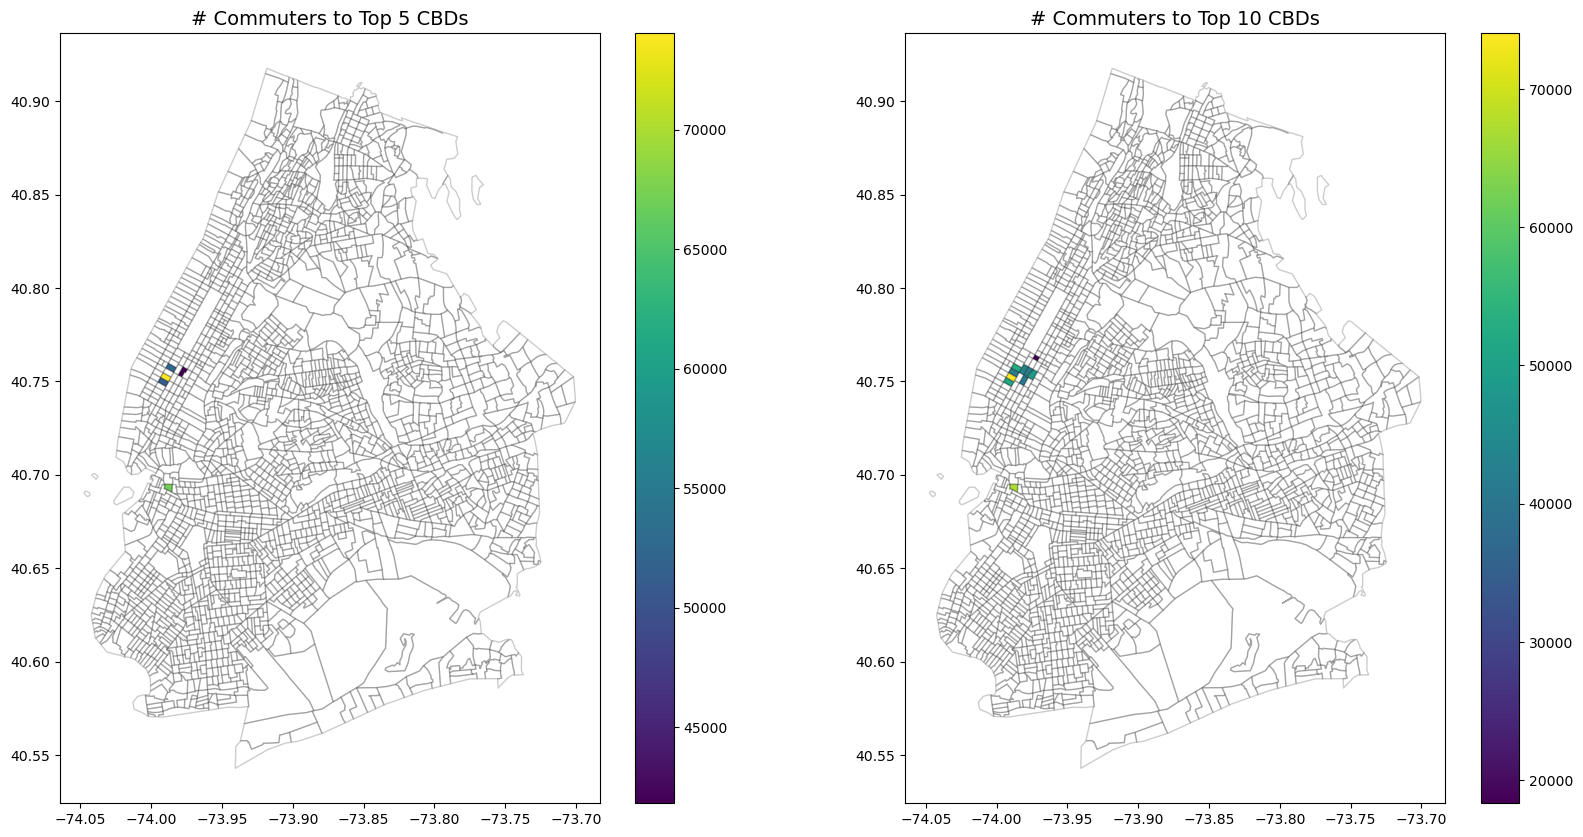

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);

In [16]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with over 15,000 jobs',nyc_cbd[nyc_cbd['S000']>15000]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with over 15,000 jobs 40.502202044977224 %


In [17]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with density > 0.2 jobs/m^2 ',nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with density > 0.2 jobs/m^2  18.029980083161536 %


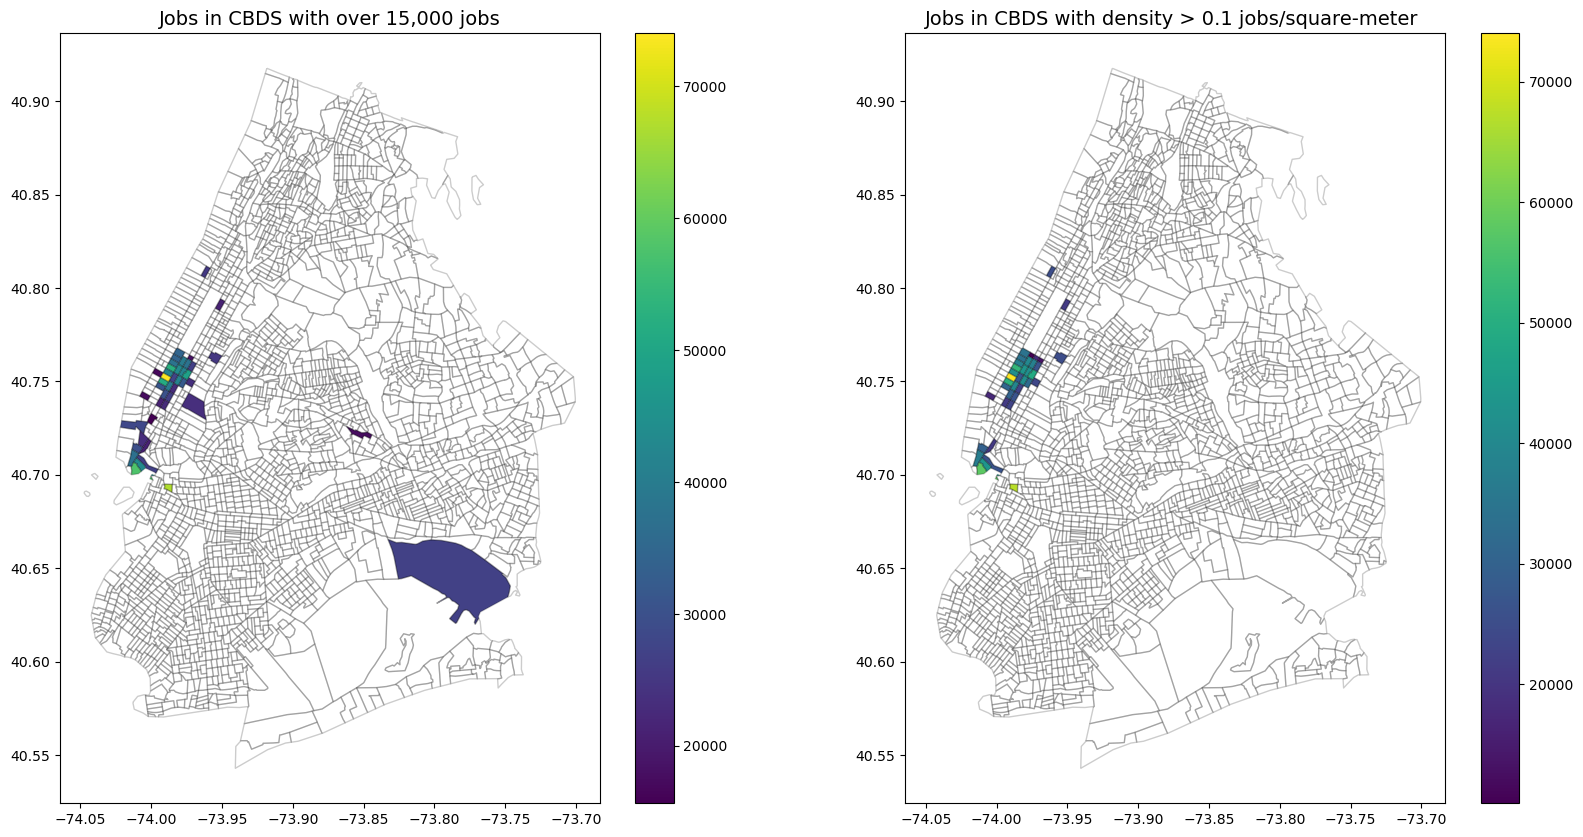

In [18]:


fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd[nyc_cbd['S000']>15000].plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd[nyc_cbd['S000_area_norm']>0.1].plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('Jobs in CBDS with over 15,000 jobs',fontsize=14);
ax2.set_title('Jobs in CBDS with density > 0.1 jobs/square-meter ',fontsize=14);

In [19]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')

<AxesSubplot:>

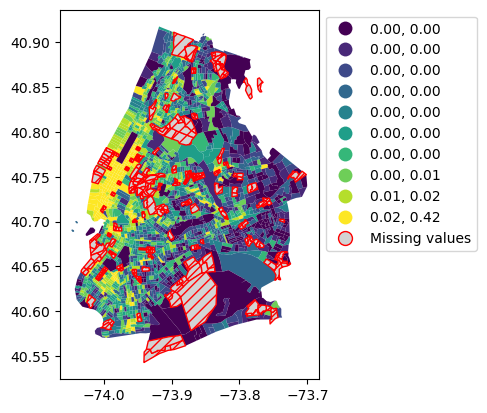

In [20]:
nyc_cbd.plot(column = 'S000_area_norm',k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})

<AxesSubplot:>

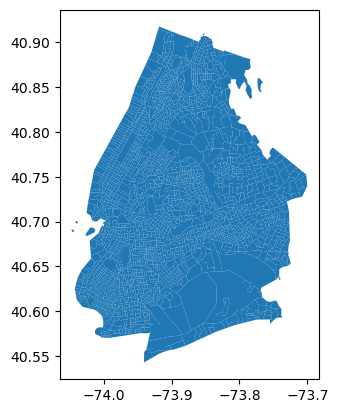

In [21]:
nyc_CT.plot()

<AxesSubplot:>

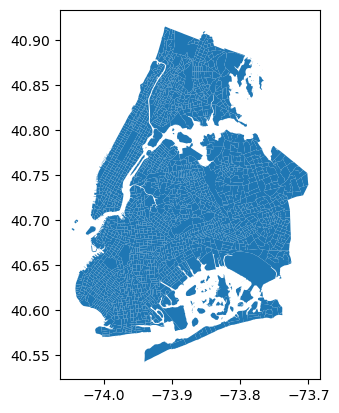

In [22]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [23]:
tracts_gdf.head()

ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
0      98         1  Manhattan  009800    1009800          I    MN19   
1     102         1  Manhattan  010200    1010200          I    MN17   
2     104         1  Manhattan  010400    1010400          I    MN17   
3     113         1  Manhattan  011300    1011300          I    MN17   
4     130         1  Manhattan  013000    1013000          I    MN40   

                         ntaname  puma     shape_leng     shape_area  \
0        Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074   
1          Midtown-Midtown South  3807  5687.80243891  1860992.68163   
2          Midtown-Midtown South  3807  5693.03636707  1864600.43538   
3          Midtown-Midtown South  3807  5699.86064037  1890907.25105   
4  Upper East Side-Carnegie Hill  3805  5807.97295649  1918144.56374   

         geoid  Center_Lat  Center_Lon  area_km2  \
0  36061009800   40.755788  -73.967775  0.177075   
1  36061010200   40.759424  -73.974449  0.172893   
2  36061010400   40.760779  -73.977673  0.173228   
3  36061011300   40.754775  -73.987870  0.175672   
4  36061013000   40.772736  -73.964734  0.178202   

                                            geometry  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  
1  POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
2  POLYGON ((-73.97446 40.76229, -73.97491 40.761...  
3  POLYGON ((-73.98412 40.75484, -73.98460 40.754...  
4  POLYGON ((-73.96148 40.77432, -73.96194 40.773...

In [24]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
tracts_gdf['geoid']=tracts_gdf.geoid.astype(int)
nyc_cbd=CBD_df.merge(tracts_gdf,how='right',left_on='w_geocode_ct',right_on='geoid') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['area_km2'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3913207.0


In [29]:
nyc_cbd.head()

S000 ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil  \
801   74028.0     109         1  Manhattan  010900    1010900          I   
1331  67041.0      11         3   Brooklyn  001100    3001100          I   
415   52535.0     119         1  Manhattan  011900    1011900          I   
866   51265.0     101         1  Manhattan  010100    1010100          I   
797   41809.0      94         1  Manhattan  009400    1009400          I   

     ntacode                                           ntaname  puma  \
801     MN17                             Midtown-Midtown South  3807   
1331    BK38  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  4004   
415     MN17                             Midtown-Midtown South  3807   
866     MN17                             Midtown-Midtown South  3807   
797     MN17                             Midtown-Midtown South  3807   

         shape_leng     shape_area        geoid  Center_Lat  Center_Lon  \
801   5703.53176931  1891364.71422  36061010900   40.752251  -73.989703   
1331  5760.45786031  1814229.80572  36047001100   40.693292  -73.987710   
415   5722.09058919  1911310.53405  36061011900   40.757315  -73.986025   
866   5701.71560662  1891377.71142  36061010100   40.749731  -73.991537   
797   5738.94000015  1646379.18573  36061009400   40.755227  -73.977744   

      area_km2                                           geometry  \
801   0.175714  POLYGON ((-73.98595 40.75232, -73.98640 40.751...   
1331  0.168549  POLYGON ((-73.98514 40.69489, -73.98517 40.694...   
415   0.177567  POLYGON ((-73.98226 40.75739, -73.98271 40.756...   
866   0.175716  POLYGON ((-73.98777 40.74979, -73.98797 40.749...   
797   0.152954  POLYGON ((-73.97444 40.75656, -73.97489 40.755...   

      S000_area_norm  
801    421297.658624  
1331   397754.315022  
415    295859.700609  
866    291749.385069  
797    273343.169158

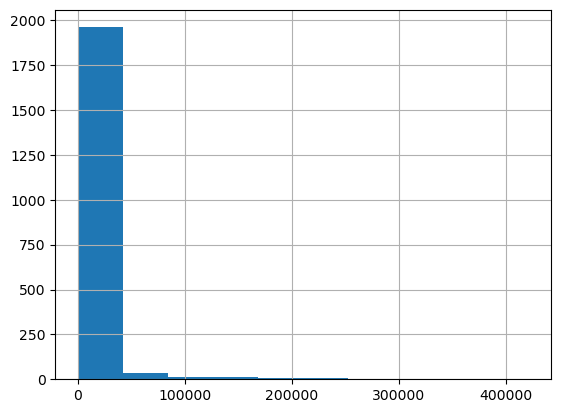

In [30]:
nyc_cbd['S000_area_norm'].hist();

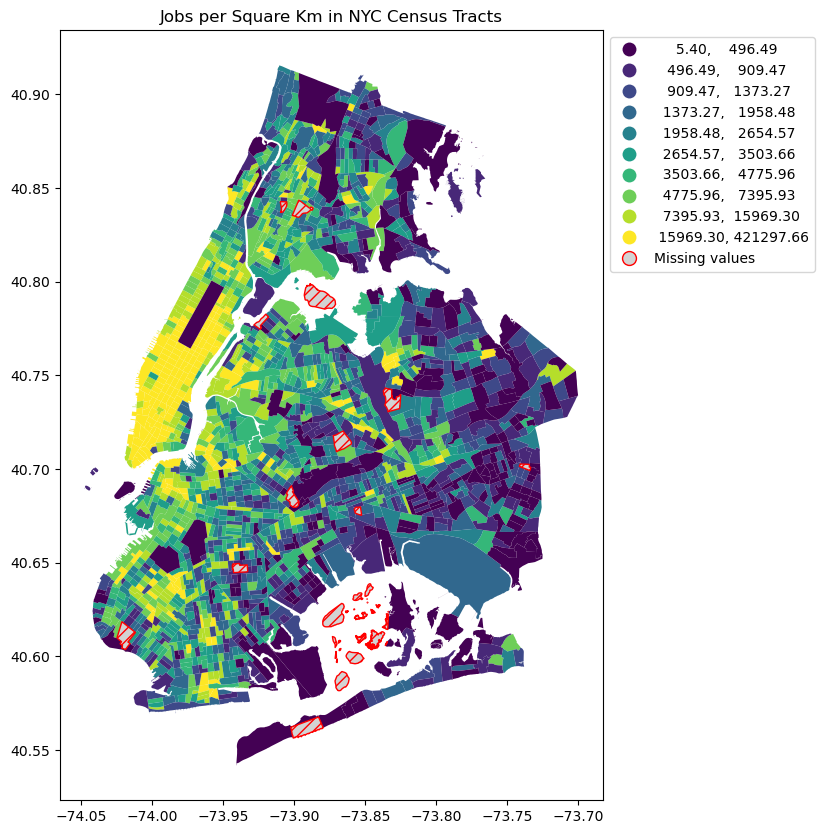

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
nyc_cbd.plot(column = 'S000_area_norm',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [32]:
# find top 10 percent
# Calculate the 90th percentile of the jobs_per_km column
jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(0.99)
print(jobs_per_km_threshold)
# # Create a new DataFrame with only the rows where jobs_per_km is in the top 10%
# top10_nyc_cbd = nyc_cbd[nyc_cbd["jobs_per_km"] >= jobs_per_km_threshold]

166870.06693971396


In [33]:
len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])

21

In [34]:
#percent of total jobs
nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()

0.22419156461694972

In [35]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(quantile)
    tract_count = len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])
    perc_tot = nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

Quantile  Jobs Threshold  Tracts  % Total Jobs
0      0.75     5857.650495   511.0      0.773890
1      0.80     7395.931497   409.0      0.730035
2      0.85     9862.789438   307.0      0.684078
3      0.90    15969.299915   205.0      0.624530
4      0.95    33147.539607   103.0      0.503975
5      0.99   166870.066940    21.0      0.224192

In [36]:
Top1 = nyc_cbd[nyc_cbd["S000_area_norm"] >= nyc_cbd["S000_area_norm"].quantile(0.99)]

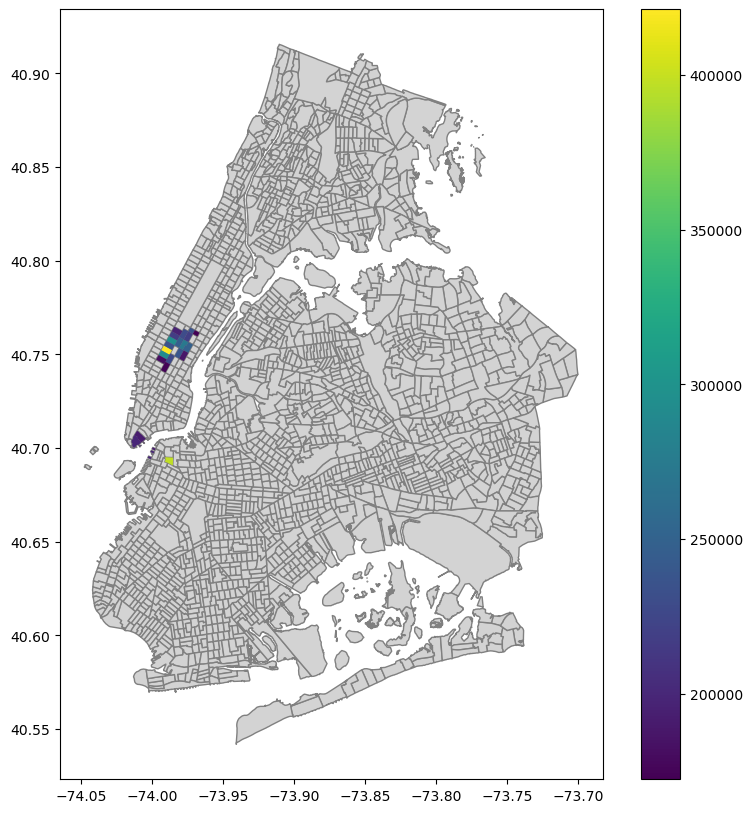

In [37]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'grey')
Top1.plot(ax = ax, column='S000_area_norm', legend=True)
plt.show()

In [39]:
#try new LEHD data source
LEHD = gpd.read_file('/Users/lizjohnson/Downloads/otm_aab0d71ba7d8441790c44b03a32c97dd/points_2019.shp')
LEHD.head()

id   c000  ca01   ca02  ca03  ce01  ce02  ce03  cns01  cns02  \
0  360050144006004   15.0   9.0    6.0   0.0  12.0   3.0   0.0    0.0    0.0   
1  360810473002006  228.0  56.0  116.0  56.0  65.0  82.0  81.0    0.0    0.0   
2  360810510001005    3.0   0.0    2.0   1.0   2.0   1.0   0.0    0.0    0.0   
3  360810528001012   13.0   2.0    7.0   4.0   4.0   2.0   7.0    0.0    0.0   
4  360050425006000   76.0  21.0   30.0  25.0  30.0  25.0  21.0    0.0    0.0   

   ...  cr07   ct01  ct02  cd01  cd02  cd03  cd04  cg01   cg02  \
0  ...   0.0    1.0  14.0   4.0   1.0   1.0   0.0  13.0    2.0   
1  ...   5.0  182.0  46.0  44.0  19.0  37.0  72.0  88.0  140.0   
2  ...   1.0    3.0   0.0   1.0   1.0   0.0   1.0   3.0    0.0   
3  ...   1.0   11.0   2.0   2.0   2.0   3.0   4.0   7.0    6.0   
4  ...   0.0   54.0  22.0   8.0  12.0  24.0  11.0  45.0   31.0   

                         geometry  
0  POINT (1838668.125 587697.312)  
1  POINT (1836180.125 577529.438)  
2  POINT (1846817.500 576940.812)  
3  POINT (1846873.375 574900.688)  
4  POINT (1832545.375 592322.625)  

[5 rows x 43 columns]

In [40]:
LEHD = LEHD.to_crs(4326)
tract_LEHD = gpd.sjoin(tracts_gdf,LEHD,how='left',predicate='contains') #merge LEHD data with tracts geodata
tract_LEHD.head()

ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
0      98         1  Manhattan  009800    1009800          I    MN19   
0      98         1  Manhattan  009800    1009800          I    MN19   
0      98         1  Manhattan  009800    1009800          I    MN19   
0      98         1  Manhattan  009800    1009800          I    MN19   
0      98         1  Manhattan  009800    1009800          I    MN19   

                   ntaname  puma     shape_leng  ... cr05  cr07    ct01  \
0  Turtle Bay-East Midtown  3808  5534.20030845  ...  2.0  37.0  1523.0   
0  Turtle Bay-East Midtown  3808  5534.20030845  ...  3.0  38.0  1451.0   
0  Turtle Bay-East Midtown  3808  5534.20030845  ...  0.0   0.0    68.0   
0  Turtle Bay-East Midtown  3808  5534.20030845  ...  0.0   3.0   103.0   
0  Turtle Bay-East Midtown  3808  5534.20030845  ...  0.0  10.0   339.0   

    ct02   cd01   cd02   cd03   cd04   cg01   cg02  
0  233.0  160.0  265.0  362.0  679.0  978.0  778.0  
0  254.0  153.0  227.0  303.0  578.0  857.0  848.0  
0   14.0   11.0   17.0   11.0   29.0   53.0   29.0  
0   27.0   21.0   23.0   38.0   33.0   80.0   50.0  
0  106.0   58.0   69.0   63.0  132.0  259.0  186.0  

[5 rows x 59 columns]

In [41]:
cl_ls = tracts_gdf.columns.tolist()+['c000']
print(cl_ls)
tract_LEHD = tract_LEHD[cl_ls[1:]]
tract_LEHD.head()

['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct201', 'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area', 'geoid', 'Center_Lat', 'Center_Lon', 'area_km2', 'geometry', 'c000']


boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
0         1  Manhattan  009800    1009800          I    MN19   
0         1  Manhattan  009800    1009800          I    MN19   
0         1  Manhattan  009800    1009800          I    MN19   
0         1  Manhattan  009800    1009800          I    MN19   
0         1  Manhattan  009800    1009800          I    MN19   

                   ntaname  puma     shape_leng     shape_area        geoid  \
0  Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074  36061009800   
0  Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074  36061009800   
0  Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074  36061009800   
0  Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074  36061009800   
0  Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074  36061009800   

   Center_Lat  Center_Lon  area_km2  \
0   40.755788  -73.967775  0.177075   
0   40.755788  -73.967775  0.177075   
0   40.755788  -73.967775  0.177075   
0   40.755788  -73.967775  0.177075   
0   40.755788  -73.967775  0.177075   

                                            geometry    c000  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  1756.0  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  1705.0  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...    82.0  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...   130.0  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...   445.0

In [43]:
# df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum()
tract_c000_agg = tract_LEHD[['geoid','c000']].groupby('geoid').sum()
tract_c000_agg.head()

c000
geoid              
36005000100     0.0
36005000200    66.0
36005000400   529.0
36005001600  1343.0
36005001900  5683.0

In [44]:
len(tract_c000_agg)

2055

In [45]:
tract_LEHD_final = tracts_gdf.merge(tract_c000_agg,on = 'geoid', how = 'left')
tract_LEHD_final.head()

ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
0      98         1  Manhattan  009800    1009800          I    MN19   
1     102         1  Manhattan  010200    1010200          I    MN17   
2     104         1  Manhattan  010400    1010400          I    MN17   
3     113         1  Manhattan  011300    1011300          I    MN17   
4     130         1  Manhattan  013000    1013000          I    MN40   

                         ntaname  puma     shape_leng     shape_area  \
0        Turtle Bay-East Midtown  3808  5534.20030845  1906016.47074   
1          Midtown-Midtown South  3807  5687.80243891  1860992.68163   
2          Midtown-Midtown South  3807  5693.03636707  1864600.43538   
3          Midtown-Midtown South  3807  5699.86064037  1890907.25105   
4  Upper East Side-Carnegie Hill  3805  5807.97295649  1918144.56374   

         geoid  Center_Lat  Center_Lon  area_km2  \
0  36061009800   40.755788  -73.967775  0.177075   
1  36061010200   40.759424  -73.974449  0.172893   
2  36061010400   40.760779  -73.977673  0.173228   
3  36061011300   40.754775  -73.987870  0.175672   
4  36061013000   40.772736  -73.964734  0.178202   

                                            geometry     c000  
0  POLYGON ((-73.96433 40.75638, -73.96479 40.755...   9865.0  
1  POLYGON ((-73.97124 40.76094, -73.97170 40.760...  48077.0  
2  POLYGON ((-73.97446 40.76229, -73.97491 40.761...  50744.0  
3  POLYGON ((-73.98412 40.75484, -73.98460 40.754...  51261.0  
4  POLYGON ((-73.96148 40.77432, -73.96194 40.773...   5116.0

<AxesSubplot:>

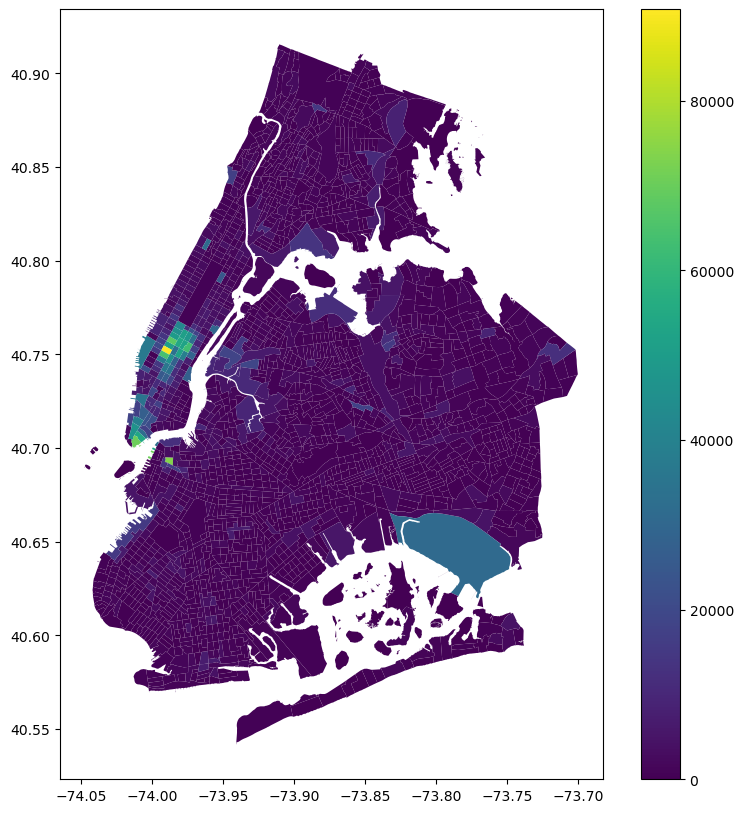

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'c000', ax = ax, legend = True)

In [48]:
tract_LEHD_final['Jobs_per_km2'] = tract_LEHD_final['c000'] / tract_LEHD_final['area_km2']
tract_LEHD_final.sort_values(by = 'Jobs_per_km2', ascending = False).head()

ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
801      109         1  Manhattan  010900    1010900          I    MN17   
1331      11         3   Brooklyn  001100    3001100          I    BK38   
415      119         1  Manhattan  011900    1011900          I    MN17   
866      101         1  Manhattan  010100    1010100          I    MN17   
797       94         1  Manhattan  009400    1009400          I    MN17   

                                               ntaname  puma     shape_leng  \
801                              Midtown-Midtown South  3807  5703.53176931   
1331  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  4004  5760.45786031   
415                              Midtown-Midtown South  3807  5722.09058919   
866                              Midtown-Midtown South  3807  5701.71560662   
797                              Midtown-Midtown South  3807  5738.94000015   

         shape_area        geoid  Center_Lat  Center_Lon  area_km2  \
801   1891364.71422  36061010900   40.752251  -73.989703  0.175714   
1331  1814229.80572  36047001100   40.693292  -73.987710  0.168549   
415   1911310.53405  36061011900   40.757315  -73.986025  0.177567   
866   1891377.71142  36061010100   40.749731  -73.991537  0.175716   
797   1646379.18573  36061009400   40.755227  -73.977744  0.152954   

                                               geometry     c000  \
801   POLYGON ((-73.98595 40.75232, -73.98640 40.751...  90785.0   
1331  POLYGON ((-73.98514 40.69489, -73.98517 40.694...  74081.0   
415   POLYGON ((-73.98226 40.75739, -73.98271 40.756...  67485.0   
866   POLYGON ((-73.98777 40.74979, -73.98797 40.749...  64109.0   
797   POLYGON ((-73.97444 40.75656, -73.97489 40.755...  52604.0   

       Jobs_per_km2  
801   516662.721379  
1331  439522.641535  
415   380053.143534  
866   364844.656733  
797   343919.827559

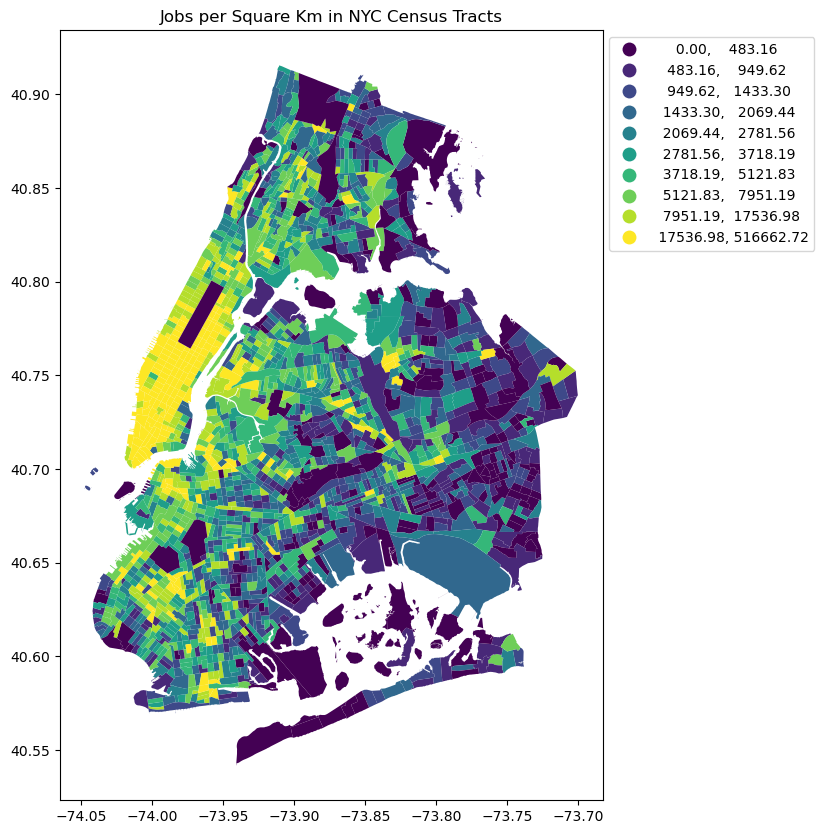

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'Jobs_per_km2',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [50]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = tract_LEHD_final['Jobs_per_km2'].quantile(quantile)
    tract_count = len(tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold])
    perc_tot = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold]['c000'].sum()/tract_LEHD_final['c000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

Quantile  Jobs Threshold  Tracts  % Total Jobs
0      0.75     6252.089426   514.0      0.790279
1      0.80     7951.194581   411.0      0.749708
2      0.85    10482.480362   309.0      0.706933
3      0.90    17536.984739   206.0      0.649727
4      0.95    37432.088128   103.0      0.534795
5      0.99   199790.222958    21.0      0.242815

In [51]:
Top1 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.99)]
Top5 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.98)]

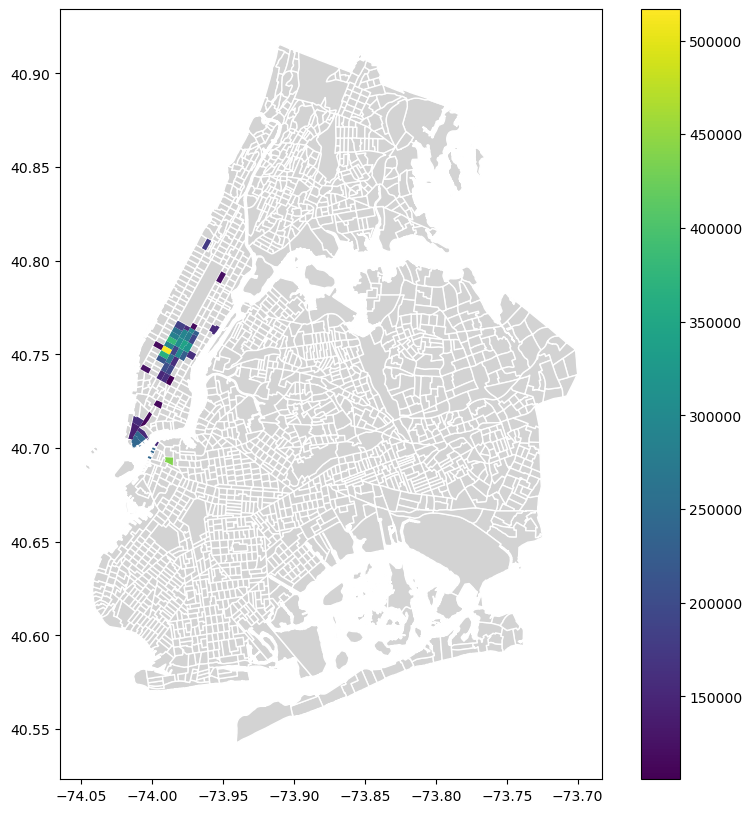

In [52]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
Top5.plot(ax = ax, column='Jobs_per_km2', legend=True)
plt.show()

In [53]:
Top5.sort_values(by = 'Jobs_per_km2', ascending = False)

ctlabel boro_code  boro_name  ct2010 boro_ct201 cdeligibil ntacode  \
801      109         1  Manhattan  010900    1010900          I    MN17   
1331      11         3   Brooklyn  001100    3001100          I    BK38   
415      119         1  Manhattan  011900    1011900          I    MN17   
866      101         1  Manhattan  010100    1010100          I    MN17   
797       94         1  Manhattan  009400    1009400          I    MN17   
1387      92         1  Manhattan  009200    1009200          I    MN19   
798       96         1  Manhattan  009600    1009600          I    MN17   
598       82         1  Manhattan  008200    1008200          I    MN20   
800   112.02         1  Manhattan  011202    1011202          I    MN17   
2        104         1  Manhattan  010400    1010400          I    MN17   
3        113         1  Manhattan  011300    1011300          I    MN17   
416      125         1  Manhattan  012500    1012500          I    MN17   
1        102         1  Manhattan  010200    1010200          I    MN17   
509      131         1  Manhattan  013100    1013100          I    MN17   
865       76         1  Manhattan  007600    1007600          I    MN17   
1764       9         1  Manhattan  000900    1000900          I    MN25   
1763       7         1  Manhattan  000700    1000700          I    MN25   
958       80         1  Manhattan  008000    1008000          I    MN20   
1379  112.03         1  Manhattan  011203    1011203          I    MN19   
1246      95         1  Manhattan  009500    1009500          I    MN17   
977       58         1  Manhattan  005800    1005800          I    MN13   
1051     100         1  Manhattan  010000    1010000          I    MN19   
672       84         1  Manhattan  008400    1008400          I    MN17   
1837      56         1  Manhattan  005600    1005600          I    MN13   
1702     137         1  Manhattan  013700    1013700          I    MN17   
1679     203         1  Manhattan  020300    1020300          I    MN09   
1838      74         1  Manhattan  007400    1007400          I    MN17   
916       52         1  Manhattan  005200    1005200          I    MN13   
1946      88         1  Manhattan  008800    1008800          I    MN19   
2012      21         1  Manhattan  002100    1002100          I    MN24   
799   112.01         1  Manhattan  011201    1011201          I    MN17   
1525   15.02         1  Manhattan  001502    1001502          I    MN25   
1547     116         1  Manhattan  011600    1011600          I    MN31   
917       54         1  Manhattan  005400    1005400          I    MN13   
2011      13         1  Manhattan  001300    1001300          I    MN25   
791       83         1  Manhattan  008300    1008300          I    MN13   
1789     168         1  Manhattan  016800    1016800          I    MN33   
1388  114.01         1  Manhattan  011401    1011401          I    MN40   
758      111         1  Manhattan  011100    1011100          I    MN13   
869       43         1  Manhattan  004300    1004300          I    MN24   
749       31         1  Manhattan  003100    1003100          I    MN24   
1769      50         1  Manhattan  005000    1005000          I    MN21   

                                               ntaname  puma     shape_leng  \
801                              Midtown-Midtown South  3807  5703.53176931   
1331  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  4004  5760.45786031   
415                              Midtown-Midtown South  3807  5722.09058919   
866                              Midtown-Midtown South  3807  5701.71560662   
797                              Midtown-Midtown South  3807  5738.94000015   
1387                           Turtle Bay-East Midtown  3808  6172.97866764   
798                              Midtown-Midtown South  3807  5737.35624494   
598                               Murray Hill-Kips Bay  3808  5681.26086932   
800                              Midtown-Midtown South  3807   3688.